In [1]:
import os
import tensorflow as tf

In [2]:
print(os.listdir('C:/Users/DELL/OneDrive/Pictures'))

['Screenshots', 'Val_dataset']


In [3]:
folders = os.listdir('C:/Users/DELL/OneDrive/Pictures')

In [4]:
folders

['Screenshots', 'Val_dataset']

In [5]:
path = 'C:/Users/DELL/OneDrive/Pictures/'
for i in folders:
    print(i, len(os.listdir(path + i)))

Screenshots 64
Val_dataset 1


In [6]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [7]:
img = image.load_img('C:/Users/DELL/OneDrive/Pictures/Screenshots/download.jpeg')

In [8]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [9]:
img = image.img_to_array(img)/255

In [10]:
img.shape

(190, 266, 3)

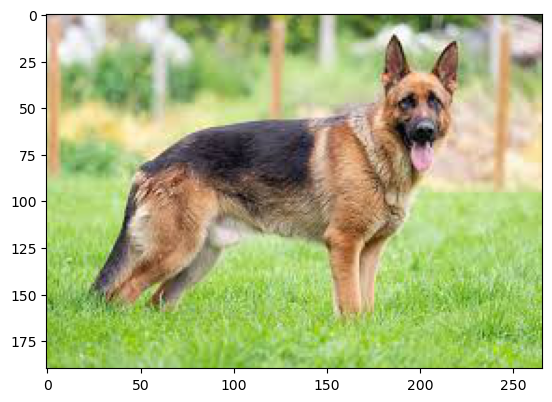

In [11]:
plt.imshow(img)

In [12]:
import keras
import keras.layers as layers
from keras.models import Sequential

In [13]:
input_shape = (250, 250, 3)
num_classes = 4
model = keras.Sequential(
    [
    keras.Input(shape = input_shape),
    layers.Conv2D(32 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)),
    layers.Conv2D(64 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Conv2D(128 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(500, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation = 'softmax')
    ]
)

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 247, 247, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 245, 245, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 122, 122, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 460800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 460800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │   230,400,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,495,752 (879.27 MB)

 Trainable params: 230,495,752 (879.27 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])

In [16]:
pip install Keras-Preprocessing

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
from keras import optimizers

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_set = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

valid_set = ImageDataGenerator(rescale=1/255)

In [20]:
train_gen = train_set.flow_from_directory(path,
                                          target_size = (250, 250),
                                          batch_size = 32,
                                          class_mode= 'categorical')

Found 128 images belonging to 2 classes.


In [21]:
path_val = 'C:/Users/DELL/OneDrive/Pictures/Val_dataset'

In [22]:
valid_gen = train_set.flow_from_directory(path_val,
                                          target_size = (250, 250),
                                          batch_size = 32,
                                          class_mode= 'categorical')

Found 64 images belonging to 1 classes.


In [23]:
for i, j in train_gen:
    print(i.shape, j.shape)
    break

(32, 250, 250, 3) (32, 2)


In [24]:
for i, j in valid_gen:
    print(i.shape, j.shape)
    break

(32, 250, 250, 3) (32, 1)


[1.]


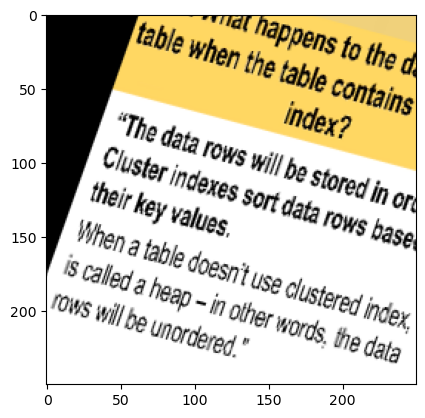

In [25]:
plt.imshow(i[-2])
print(j[-2])

In [26]:
hist = model.fit_generator(train_gen, epochs = 100, validation_data = valid_gen)

AttributeError: 'Sequential' object has no attribute 'fit_generator'

In [27]:
import torch

In [28]:
for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))